Text(0.5, 1.0, 'Gender and Survival Rate')

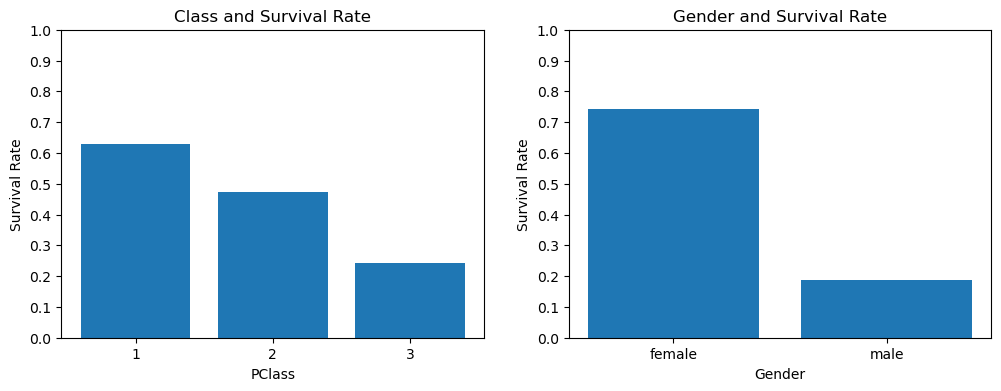

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


train_set = pd.read_csv("/kaggle/input/titanic/train.csv")
test_set = pd.read_csv("/kaggle/input/titanic/test.csv")

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# PClass 
PClassPlot = train_set['Survived'].groupby(train_set['Pclass']).mean()
ax1.bar(x=PClassPlot.index, height=PClassPlot.values)
ax1.set_ylabel('Survival Rate')
ax1.set_xlabel('PClass')
ax1.set_xticks(PClassPlot.index)
ax1.set_yticks(np.arange(0, 1.1,.1))
ax1.set_title("Class and Survival Rate")

# Sex 
GenderPlot = train_set['Survived'].groupby(train_set['Sex']).mean()
ax2.bar(x=GenderPlot.index, height=GenderPlot.values)
ax2.set_ylabel('Survival Rate')
ax2.set_xlabel('Gender')
ax2.set_xticks(GenderPlot.index)
ax2.set_yticks(np.arange(0, 1.1,.1))
ax2.set_title('Gender and Survival Rate')

これからわかるのは，1等客室の乗客は生存しやすい．女性は生存しやすいということがわかる．

Text(0.5, 1.0, 'Number of Parents and Children abroad and Survival Rate')

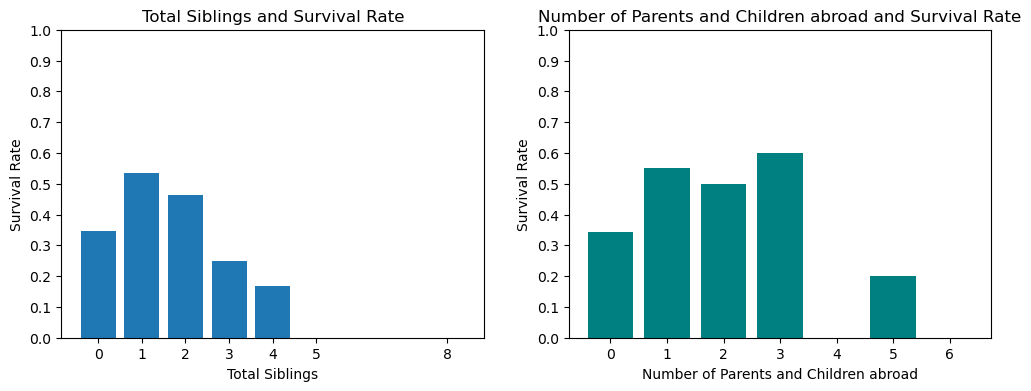

In [2]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# SibSp （同乗中の兄弟/配偶者の数）
SiblingPlot = train_set['Survived'].groupby(train_set['SibSp']).mean()
ax1.bar(x=SiblingPlot.index, height=SiblingPlot.values)
ax1.set_ylabel('Survival Rate')
ax1.set_xlabel('Total Siblings')
ax1.set_xticks(SiblingPlot.index)
ax1.set_yticks(np.arange(0, 1.1,.1))
ax1.set_title('Total Siblings and Survival Rate')

# Parch （同乗中の親/子供の数）
ParchPlot = train_set['Survived'].groupby(train_set['Parch']).mean()
ax2.bar(x=ParchPlot.index, height=ParchPlot.values, width = .8, color='Teal')
ax2.set_ylabel('Survival Rate')
ax2.set_xlabel('Number of Parents and Children abroad')
ax2.set_xticks(ParchPlot.index)
ax2.set_yticks(np.arange(0, 1.1,.1))
ax2.set_title('Number of Parents and Children abroad and Survival Rate')

Siblings(兄弟)が0人よりも，1人以上の方が生存しやすい．また，親兄弟が0人よりも，1人以上の方が生存しやすいことがわかる．

年齢には欠損値があるので，これの処理を行う．

/tmp/ipykernel_20/1614778650.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_set.corr())


<Axes: >

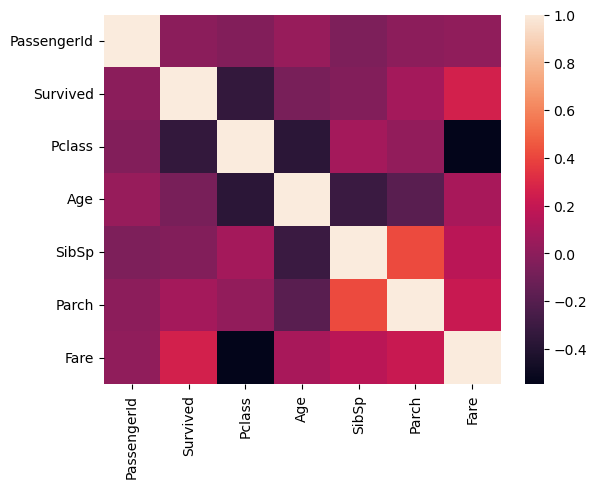

In [3]:
#train_set.isnull().sum()

import seaborn as sns
sns.heatmap(train_set.corr())


Cabin(客室番号)は欠損が多く，また特徴量には使えそうにないので除外する．  
一方，Age（年齢）とEmbarked（出発港）は，なんらかの欠損値補完を行う必要がある．

Age（年齢）は，中央値で補完することにする．

In [4]:
# 欠損値 Age（年齢）は中央値で補完する
train_set['Age'].fillna(train_set['Age'].median(), inplace=True)

In [5]:
# 欠損値 Embarked（出発港）を補完するために，どの港が多いか調べる
train_set['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
# Sのサウサンプトン(Southampton)が多いのでSで埋める．
train_set['Embarked'].fillna('S', inplace=True)

In [7]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [8]:
test_set.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

これで，Cabin（客室番号）以外の欠損値が補完できた．  

次に，カテゴリデータの処理を行う．  
カテゴリデータとは，Sex（性別）のMale, Femaleのような文字列のことである． 機械学習では，このような文字列は処理が困難なので，数値に変換する．

- Sex（性別） : Male, Female
- Embarked(出発港): S, C, Q
- Pclass(旅客等級）: 1, 2, 3

Sex（性別）は，Maleを1, Femaleを0に変換する．

In [9]:
# 処理前の最初の5行を表示
train_set['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [10]:
train_preprosessed = train_set
test_preprosessed = test_set

In [11]:
train_preprosessed['Sex'] = train_preprosessed['Sex'].apply(lambda x: 1 if x == 'male' else 0)
test_preprosessed['Sex'] = test_preprosessed['Sex'].apply(lambda x: 1 if x == 'male' else 0)
#train_preprosessed['Embarked'] = train_preprosessed['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
#test_preprosessed['Embarked'] = test_preprosessed['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [12]:
# Embarkedの確認
train_set['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [13]:
# Embarked （出発港）をダミー変数へ変換
Embarked = pd.get_dummies(train_set['Embarked'], drop_first=True)
Embarked.columns = ['Embarked-Q','Embarked-S']

# Pclass （旅客等級）をダミー変数へ変換
Pclass = pd.get_dummies(train_set['Pclass'], drop_first=True)
Pclass.columns = ['PClass2','PClass3']

# Embarkedの確認
Embarked.head()

,Embarked-Q,Embarked-S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


Embarkedに対してOne-Hotエンコーディングを行う．

In [14]:
def Onehot_preprosessing(set_data, cl_name):
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder(categories="auto", sparse=False)
    #print(set_data)
    encoded = encoder.fit_transform(set_data[cl_name].values.reshape(-1, 1))
    #encoded_test  = encoder.fit_transform(test_set[cl_name].value.reshape(-1, 1))
    #encoded
    # カラム名
    column_name = []
    for i in range(len(encoder.categories_)):
        column_name.append(cl_name + "_"+encoder.categories_[i])

    encoded_set = pd.DataFrame(encoded, columns=column_name)
    encoded_set = encoded_set.drop(encoded_set.columns[[2]], axis=1)
    preprosessed = pd.concat([set_data, encoded_set], axis=1)
    preprosessed = preprosessed.drop(columns=[cl_name])


    return preprosessed


In [15]:
def Onehot_preprosessing2(train_data, test_data, cl_name):
    from sklearn.preprocessing import OneHotEncoder
    train_encoder = OneHotEncoder(categories="auto", sparse=False)
    test_encoder = OneHotEncoder(categories="auto", sparse=False)
    #print(train_data)
    train_encoded = train_encoder.fit_transform(train_data[cl_name].values.reshape(-1, 1))
    test_encoded = test_encoder.fit_transform(test_data[cl_name].values.reshape(-1, 1))
    #encoded_test  = encoder.fit_transform(test_set[cl_name].value.reshape(-1, 1))
    #encoded
    # カラム名
    column_name_train = []
    column_name_test = []
    print(train_encoded.shape)
    print()

    for i in range(len(train_encoder.categories_[0])):
        column_name_train.append(cl_name + "_"+train_encoder.categories_[0][i])
    for i in range(len(test_encoder.categories_[0])):
        column_name_test.append(cl_name + "_"+test_encoder.categories_[0][i])


    train_encoded_set = pd.DataFrame(train_encoded, columns=column_name_train)
    #train_encoded_set = train_encoded_set.drop(train_encoded_set.columns[[-1]], axis=1)
    train_preprosessed = pd.concat([train_data, train_encoded_set], axis=1)
    train_preprosessed = train_preprosessed.drop(columns=[cl_name])

    
    
    col_name_add = list(set(column_name_test)-set(column_name_train))
    add_data = np.zeros((train_encoded.shape[0], len(col_name_add)))
    add_encoded_set = pd.DataFrame(add_data, columns=col_name_add)
    train_preprosessed = pd.concat([train_preprosessed, add_encoded_set], axis=1)


    
    test_encoded_set = pd.DataFrame(test_encoded, columns=column_name_test)
    #test_encoded_set = test_encoded_set.drop(test_encoded_set.columns[[-1]], axis=1)
    test_preprosessed = pd.concat([test_data, test_encoded_set], axis=1)
    test_preprosessed = test_preprosessed.drop(columns=[cl_name])
    print(column_name_train)
    print(column_name_test)
    print( list(set(column_name_train)-set(column_name_test)))


    
    print("l")
    col_name_add = list(set(column_name_train)-set(column_name_test))
    add_data = np.zeros((test_encoded.shape[0], len(col_name_add)))
    add_encoded_set = pd.DataFrame(add_data, columns=col_name_add)
    test_preprosessed = pd.concat([test_preprosessed, add_encoded_set], axis=1)

    return train_preprosessed, test_preprosessed


Embarkedに対するone-hotエンコーディングと，欠損値の多いCabinの削除   
また，関連性の無いと思われるTicket・cabinの削除

In [16]:

train_preprosessed, test_preprosessed = Onehot_preprosessing2(train_data=train_set, test_data=test_set, cl_name="Embarked")


(891, 3)

['Embarked_C', 'Embarked_Q', 'Embarked_S']
['Embarked_C', 'Embarked_Q', 'Embarked_S']
[]
l


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
#train_preprosessed = Onehot_preprosessing(set_data=train_set, cl_name="Embarked")
train_preprosessed = train_preprosessed.drop(columns=["Cabin","Ticket"])
#test_preprosessed = Onehot_preprosessing(set_data=test_set, cl_name="Embarked")
test_preprosessed = test_preprosessed.drop(columns=["Cabin","Ticket"])


## ageの補完 
ageは，身分ごとに平均をとっていこうと思う．

In [18]:
# 新しく身分を示すカラムを作成する．
train_preprosessed["state"] = np.nan
test_preprosessed["state"] = np.nan

# train_preprosessedの称号を確認 
names = train_preprosessed["Name"]

# 称号に.がついていることがわかったため，称号だけを取り出す．
for i in range(len(names)):
    s = names[i].split(" ")
    for k in range(len(s)):
        if "."in s[k]:
            s_index = k
            break
    train_preprosessed["state"][i] = s[s_index]


names = test_preprosessed["Name"]
for i in range(len(names)):
    s = names[i].split(" ")
    for k in range(len(s)):
        if "."in s[k]:
            s_index = k
            break
    test_preprosessed["state"][i] = s[s_index]

print(train_preprosessed["state"].unique())
print(test_preprosessed)


['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Don.' 'Rev.' 'Dr.' 'Mme.' 'Ms.' 'Major.'
 'Lady.' 'Sir.' 'Mlle.' 'Col.' 'Capt.' 'Countess.' 'Jonkheer.']
     PassengerId  Pclass                                          Name  Sex  \
0            892       3                              Kelly, Mr. James    1   
1            893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2            894       2                     Myles, Mr. Thomas Francis    1   
3            895       3                              Wirz, Mr. Albert    1   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   
..           ...     ...                                           ...  ...   
413         1305       3                            Spector, Mr. Woolf    1   
414         1306       1                  Oliva y Ocana, Dona. Fermina    0   
415         1307       3                  Saether, Mr. Simon Sivertsen    1   
416         1308       3                           Ware, Mr. Frederick  

/tmp/ipykernel_20/3102033001.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_preprosessed["state"][i] = s[s_index]
/tmp/ipykernel_20/3102033001.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_preprosessed["state"][i] = s[s_index]


In [19]:
"""
a = np.concatenate([train_preprosessed["state"].unique(), test_preprosessed["state"].unique()], 0)
state = np.unique(a)

for i in range(len(train_preprosessed)):
    train_preprosessed["state"][i] = int(list(state).index(train_preprosessed["state"][i]))
for i in range(len(test_preprosessed)):
    test_preprosessed["state"][i] = int(list(state).index(test_preprosessed["state"][i]))

train_preprosessed['state'] = train_preprosessed['state'].astype(np.int64)
test_preprosessed['state'] = test_preprosessed['state'].astype(np.int64)
"""

'\na = np.concatenate([train_preprosessed["state"].unique(), test_preprosessed["state"].unique()], 0)\nstate = np.unique(a)\n\nfor i in range(len(train_preprosessed)):\n    train_preprosessed["state"][i] = int(list(state).index(train_preprosessed["state"][i]))\nfor i in range(len(test_preprosessed)):\n    test_preprosessed["state"][i] = int(list(state).index(test_preprosessed["state"][i]))\n\ntrain_preprosessed[\'state\'] = train_preprosessed[\'state\'].astype(np.int64)\ntest_preprosessed[\'state\'] = test_preprosessed[\'state\'].astype(np.int64)\n'

In [20]:
# テストデータのageの欠損値を"state"から平均値で埋める
grouped = train_preprosessed.groupby("state")
group_age = grouped.mean()["Age"]
#print(group_age)
for i in range(len(test_preprosessed)):
    #print(type(np.nan))
    if np.isnan( test_preprosessed["Age"][i] ):
        test_preprosessed["Age"][i] = group_age[test_preprosessed["state"][i]]
        #print(state[test_preprosessed["state"][i]], group_age[test_preprosessed["state"][i]])

print(group_age)

state
Capt.        70.000000
Col.         58.000000
Countess.    33.000000
Don.         40.000000
Dr.          40.000000
Jonkheer.    38.000000
Lady.        48.000000
Major.       48.500000
Master.       6.916750
Miss.        23.005495
Mlle.        24.000000
Mme.         24.000000
Mr.          31.362669
Mrs.         34.824000
Ms.          28.000000
Rev.         43.166667
Sir.         49.000000
Name: Age, dtype: float64


/tmp/ipykernel_20/846270019.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_age = grouped.mean()["Age"]
/tmp/ipykernel_20/846270019.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_preprosessed["Age"][i] = group_age[test_preprosessed["state"][i]]


In [21]:
# 名前をdrop
train_preprosessed = train_preprosessed.drop(columns=["Name", "PassengerId"])
test_preprosessed = test_preprosessed.drop(columns=["Name", "PassengerId"])

In [22]:
train_preprosessed1 = train_preprosessed
train_preprosessed, test_preprosessed = Onehot_preprosessing2(train_data=train_preprosessed, test_data=test_preprosessed, cl_name="state")



(891, 17)

['state_Capt.', 'state_Col.', 'state_Countess.', 'state_Don.', 'state_Dr.', 'state_Jonkheer.', 'state_Lady.', 'state_Major.', 'state_Master.', 'state_Miss.', 'state_Mlle.', 'state_Mme.', 'state_Mr.', 'state_Mrs.', 'state_Ms.', 'state_Rev.', 'state_Sir.']
['state_Col.', 'state_Dona.', 'state_Dr.', 'state_Master.', 'state_Miss.', 'state_Mr.', 'state_Mrs.', 'state_Ms.', 'state_Rev.']
['state_Don.', 'state_Mme.', 'state_Jonkheer.', 'state_Mlle.', 'state_Capt.', 'state_Sir.', 'state_Major.', 'state_Countess.', 'state_Lady.']
l


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,state_Col.,...,state_Rev.,state_Don.,state_Mme.,state_Jonkheer.,state_Mlle.,state_Capt.,state_Sir.,state_Major.,state_Countess.,state_Lady.
0,3,1,34.500000,0,0,7.8292,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0,47.000000,1,0,7.0000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,62.000000,0,0,9.6875,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,27.000000,0,0,8.6625,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,0,22.000000,1,1,12.2875,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,31.362669,0,0,8.0500,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,1,0,39.000000,0,0,108.9000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,3,1,38.500000,0,0,7.2500,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
416,3,1,31.362669,0,0,8.0500,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


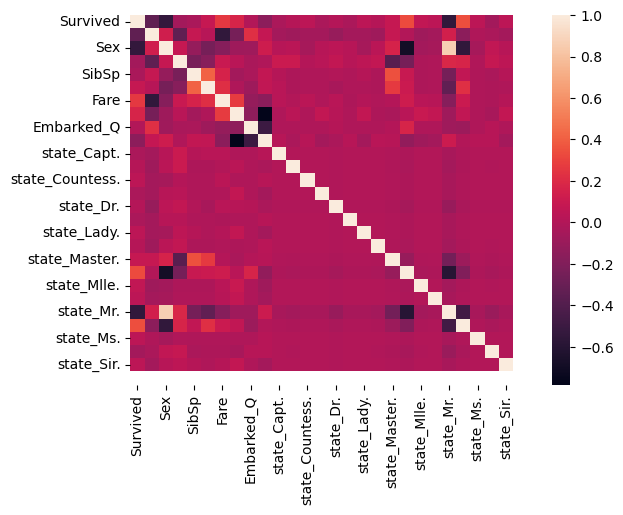

In [23]:
#print(train_preprosessed.isnull().sum())
#print(test_preprosessed.isnull().sum())

# testデータのFareに欠損値があることがわかる．
print(type(train_preprosessed))
sns.heatmap(train_preprosessed.corr())
test_preprosessed


In [24]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

X_train_fare = train_preprosessed.drop(columns=["Fare", "Survived", "Sex", "Age"])
y_train_fare = train_preprosessed[["Fare"]]

sscaler = preprocessing.StandardScaler()
X_train_fare = sscaler.fit_transform(X_train_fare)

lr = LinearRegression()
lr.fit(X_train_fare, y_train_fare)
lr.score(X_train_fare, y_train_fare)
# 
#test_fare = 
# 精度が低いので，やめることにする

0.40771569717737755

In [25]:
test_preprosessed["Fare"] = test_preprosessed["Fare"].fillna(test_preprosessed["Fare"].mean())
train_preprosessed.isnull().sum()
#test_preprosessed.dtypes

Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
state_Capt.        0
state_Col.         0
state_Countess.    0
state_Don.         0
state_Dr.          0
state_Jonkheer.    0
state_Lady.        0
state_Major.       0
state_Master.      0
state_Miss.        0
state_Mlle.        0
state_Mme.         0
state_Mr.          0
state_Mrs.         0
state_Ms.          0
state_Rev.         0
state_Sir.         0
state_Dona.        0
dtype: int64

## これらの前処理を行った後，決定木とランダムフォレストで学習し，比較する．

In [26]:
import pandas as pd
df = pd.read_csv("/kaggle/input/titanic/train.csv")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (roc_curve, auc, accuracy_score)

In [27]:
clf1 = DecisionTreeClassifier(random_state=0)
#欠損値処理
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')

#カテゴリ変数の変換
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

df = df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)
train_X1 = df.drop('Survived', axis=1)
train_y1 = df.Survived

(train_X1, test_X1 ,train_y1, test_y1) = train_test_split(train_X1, train_y1, test_size = 0.3, random_state = 666)
clf1 = clf1.fit(train_X1, train_y1)
score = clf1.score(train_X1, train_y1)

pred = clf1.predict(test_X1)
fpr, tpr, thresholds = roc_curve(test_y1, pred, pos_label=1)
print(auc(fpr, tpr))
print(accuracy_score(pred, test_y1))


0.7837689688996596
0.7947761194029851


In [28]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0
887,1,1,0,19.0,0,0,30.0000,0
888,0,3,0,28.0,1,2,23.4500,0
889,1,1,1,26.0,0,0,30.0000,1


### 決定木

In [29]:
clf2 = DecisionTreeClassifier(random_state=0)

train_X2 = train_preprosessed.drop(columns=["Survived"])
train_y2 = train_preprosessed["Survived"]

(train_X2, test_X2 ,train_y2, test_y2) = train_test_split(train_X2, train_y2, test_size = 0.3, random_state = 666)

clf2 = clf2.fit(train_X2, train_y2)
score = clf2.score(train_X2, train_y2)

pred = clf2.predict(test_X2)
fpr, tpr, thresholds = roc_curve(test_y2, pred, pos_label=1)
print(auc(fpr, tpr))
print(accuracy_score(pred, test_y2))

0.8158790606427789
0.8208955223880597


In [30]:
import pydotplus
from IPython.display import Image
from graphviz import Digraph
from six import StringIO
from sklearn import tree

dot_data = StringIO()
tree.export_graphviz(clf2, out_file=dot_data,feature_names=train_X2.columns, max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("titanic_graph.pdf")
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

## ランダムフォレスト

In [ ]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=0)
clf1 = clf1.fit(train_X1, train_y1)
pred = clf1.predict(test_X1)
fpr, tpr, thresholds = roc_curve(test_y1, pred, pos_label=1)
print(auc(fpr, tpr))
print(accuracy_score(pred, test_y1))

In [ ]:
clf2 = RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=0)
clf2 = clf2.fit(train_X2, train_y2)
pred = clf2.predict(test_X2)
fpr, tpr, thresholds = roc_curve(test_y2, pred, pos_label=1)
print(auc(fpr, tpr))
print(accuracy_score(pred, test_y2))

## ロジスティック回帰

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver="lbfgs", multi_class="ovr")
lr.fit(train_X1, train_y1)
pred = lr.predict(test_X1)
fpr, tpr, thresholds = roc_curve(test_y1, pred, pos_label=1)
print(auc(fpr, tpr))
print(accuracy_score(pred, test_y1))

In [ ]:

lr2 = LogisticRegression(C=100.0, random_state=1, solver="lbfgs", multi_class="ovr")
lr2.fit(train_X2, train_y2)
pred = lr2.predict(test_X2)
fpr, tpr, thresholds = roc_curve(test_y1, pred, pos_label=1)
print(auc(fpr, tpr))
print(accuracy_score(pred, test_y2))

## SVM

In [ ]:
from sklearn.svm import SVC

svm1 = SVC(C=1.0, random_state=1, kernel="linear")
svm1.fit(train_X1, train_y1)
pred = svm1.predict(test_X1)
fpr, tpr, thresholds = roc_curve(test_y1, pred, pos_label=1)
print(auc(fpr, tpr))
print(accuracy_score(pred, test_y1))

In [ ]:
svm2 = SVC(C=1.0, random_state=1, kernel="linear")
svm2.fit(train_X2, train_y2)
pred = svm2.predict(test_X2)
fpr, tpr, thresholds = roc_curve(test_y1, pred, pos_label=1)
print(auc(fpr, tpr))
print(accuracy_score(pred, test_y2))

In [ ]:
import matplotlib.pyplot as plt

features = train_X1.columns
importances = clf1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

# kaggleに投稿してみよう

In [ ]:
import pandas as pd
df = pd.read_csv('TitanicData/test.csv')

from sklearn.model_selection import train_test_split

#欠損値処理
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')

#カテゴリ変数の変換
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [ ]:
PassengerID = df['PassengerId']

In [ ]:
df = df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)

In [ ]:
pred1 = svm1.predict(df)
pred2 = svm2.predict(test_preprosessed)

In [ ]:
np.equal(pred1, pred2)

In [ ]:
PassengerID

In [ ]:
my_solution = pd.DataFrame({'PassengerId':PassengerID,'Survived':pred2})
my_solution = my_solution.set_index('PassengerId')
my_solution.to_csv('submit.csv')